<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E6%95%99%E7%B7%B4%E5%B8%B6%E8%B7%91/Task%2008/Task_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#作業1

#作業2 機器學習 - 分類與迴歸

---

練習：請根據給定的資料集，分成前 7 筆的訓練資料與後 3 筆的測試資料完成以下兩個分析：

* 利用 Country, Age, Salary 對 Purchased 進行分類學習，印出後三筆資料的 Purchased 為何
* 利用 Country, Age, Purchased 對 Salary 進行迴歸學習，印出後三筆資料的 Salary 為何

In [32]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

source = 'https://raw.githubusercontent.com/MachineLearningLiuMing/scikit-learn-primer-guide/master/Data.csv'
df = pd.read_csv(source)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [33]:
df.groupby(['Country', 'Age'], dropna=False).agg({'Salary': 'mean'})

Salary
Country Age          
France  35.0  58000.0
        37.0  67000.0
        44.0  72000.0
        48.0  79000.0
Germany 30.0  54000.0
        40.0      NaN
        50.0  83000.0
Spain   27.0  48000.0
        38.0  61000.0
        NaN   52000.0

In [34]:
# clean data
df_cleaned = df.copy()

# 使用線性內插法填補缺失值
df_cleaned['Salary'] = df_cleaned.groupby(['Country'])['Salary'].apply(lambda x: x.interpolate())
df_cleaned = df_cleaned.groupby('Country', group_keys=False).apply(lambda x: round(x.sort_values('Salary').interpolate().reindex(x.index)))

df_cleaned.groupby(['Country', 'Age']).agg({'Salary': 'mean'})

<ipython-input-34-3dd962efdb55>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_cleaned['Salary'] = df_cleaned.groupby(['Country'])['Salary'].apply(lambda x: x.interpolate())


Salary
Country Age          
France  35.0  58000.0
        37.0  67000.0
        44.0  72000.0
        48.0  79000.0
Germany 30.0  54000.0
        40.0  68500.0
        50.0  83000.0
Spain   27.0  48000.0
        32.0  52000.0
        38.0  61000.0

In [35]:
# 類別轉數字
# 將 Country 欄位轉換成數字型態
df_cleaned = pd.get_dummies(df_cleaned, columns = ['Country'])
df_cleaned

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,0,0,1
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,68500.0,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,32.0,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,Yes,1,0,0


In [36]:
# 分訓練&測試
train_data = df_cleaned.iloc[:7]
test_data = df_cleaned.iloc[-3:]

## 利用 Country, Age, Salary 對 Purchased 進行分類學習，印出後三筆資料的 Purchased 為何

In [37]:
X_train = train_data[['Country_France',	'Country_Germany', 'Country_Spain', 'Age', 'Salary']]
y_train = train_data['Purchased']
X_test = test_data[['Country_France',	'Country_Germany', 'Country_Spain', 'Age', 'Salary']]
y_test = test_data['Purchased']

In [38]:
# 使用 SVC 分類器進行分類
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred_SVC = model.predict(X_test)

# 決策樹
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred_DecisionTree = classifier.predict(X_test)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred_LogisticRegression = classifier.predict(X_test)

# 彙整
res = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_SVC), pd.Series(y_pred_DecisionTree), pd.Series(y_pred_LogisticRegression)], axis=1)
res.columns = ['Test', 'SVC', 'DecisionTree', 'LogisticRegression']
res

,Test,SVC,DecisionTree,LogisticRegression
0,Yes,No,No,No
1,No,No,Yes,No
2,Yes,No,No,No


##利用 Country, Age, Purchased 對 Salary 進行迴歸學習，印出後三筆資料的 Salary 為何

In [39]:
# 類別轉數字
# 將 Purchased 欄位轉換成1,0型態
# df['Purchased'] = df['Purchased'].map({'Yes': 1, 'No': 0})
from sklearn.preprocessing import LabelEncoder
df_cleaned['Purchased'] = label_encoder.fit_transform(df_cleaned['Purchased'])
df_cleaned

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,68500.0,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,32.0,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


In [42]:
# 分訓練&測試
train_data = df_cleaned.iloc[:7]
test_data = df_cleaned.iloc[-3:]

X_train = train_data[['Country_France',	'Country_Germany', 'Country_Spain', 'Age', 'Purchased']]
y_train = train_data['Salary']
X_test = test_data[['Country_France',	'Country_Germany', 'Country_Spain', 'Age', 'Purchased']]
y_test = test_data['Salary']

In [43]:
# LogisticRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_LogisticRegression = np.round(model.predict(X_test)).astype(int) #77313,81856,61904

# SVR
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred_SVR = np.round(model.predict(X_test)).astype(int) #58429, 58494, 58066

# DecisionTree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred_DecisionTree = np.round(model.predict(X_test)).astype(int) #68500,72000,58000

# RandomForest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred_RandomForest = np.round(model.predict(X_test)).astype(int) #68380,68625,61065

# 彙整
res = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_LogisticRegression), pd.Series(y_pred_SVR), pd.Series(y_pred_DecisionTree), pd.Series(y_pred_RandomForest)], axis=1)
res.columns = ['Test', 'LogisticRegression', 'SVR', 'DecisionTree', 'RandomForest']
res

,Test,LogisticRegression,SVR,DecisionTree,RandomForest
0,79000.0,77313,58429,68500,68380
1,83000.0,81856,58494,72000,68625
2,67000.0,61904,58066,58000,61065


#作業3 機器學習 - 分群

---

練習：請根據給定的資料集，利用 K-means 進行分群，請比較看看 k = 3、4、5 哪一種可能比較好？為什麼？

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

print('===== 原始資料 =====')
df = pd.DataFrame(X)
df

===== 原始資料 =====


,0,1
0,1,2
1,1,4
2,1,0
3,4,2
4,4,4
5,4,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# WCSS 、Silhouette 、Calinski_harabasz、Davies_bouldin 評估聚合效果指標
# WCSS(Within-Cluster Sum of Squares)：代表每個組內樣本距離其簇心的平方和，通常用於衡量聚類效果的好壞。WCSS越小代表組內的樣本越相似
# SilhouetteScore：介於-1到1之間的分數，對於每個樣本，該指標計算其與同組內的樣本距離與與最近不同組的樣本距離之差除以二者中的較大者。
#   SilhouetteScore越接近1，表示樣本與自己的組更相似，樣本與其他組更不相似，表示聚類效果較好。
# Calinski-Harabasz Index: 該指標越大表示聚類效果越好。該指標的計算公式包括組內的平均方差和組間的平均方差，其分母為組內的平均方差，分子則為組間平均方差，當組間的平均方差大時，該指標也會相應增大，聚類效果也會更好。
# Davies-Bouldin Index：計算組之間的平均距離和組內部樣本的平均距離，以及考慮每個組的大小來計算。當該指標越小，表示聚類效果越好
'''
# 懶人包
WCSS 越小聚合越好
SS 越大聚合越好
CHI 越大聚合越好
DBI 越小聚合越好
'''
for k in range(3, 6):
  kmeans = KMeans(n_clusters = k, random_state = 0)
  kmeans.fit(X)
  wcss = kmeans.inertia_
  silhouette = silhouette_score(X, kmeans.labels_)
  ch_score = calinski_harabasz_score(X, kmeans.labels_)
  db_score = davies_bouldin_score(X, kmeans.labels_)
  print("k =", k,
     "\nlabels :", kmeans.labels_,
     "\nWCSS : ", wcss,
     "\nSilhouette : ", silhouette,
     "\nCalinski_harabasz : ", ch_score,
     "\nDavies_bouldin : ", db_score,
     '\n')

# 6組資料分3組就夠，不需要到5個高維度
# 分3個組別，每組內部的樣本差異較小，性質較相同
# 且k=3, Silhouette Score 最高，Calinski-Harabasz Index 最大，Davies-Bouldin Index 最小

k = 3 
labels : [0 0 0 1 2 1] 
WCSS :  10.0 
Silhouette :  0.16152130729125916 
Calinski_harabasz :  2.925 
Davies_bouldin :  0.6151765685206877 

k = 4 
labels : [1 3 1 0 0 2] 
WCSS :  4.0 
Silhouette :  0.1111111111111111 
Calinski_harabasz :  4.25 
Davies_bouldin :  0.4440167647792812 

k = 5 
labels : [4 3 1 0 0 2] 
WCSS :  2.0 
Silhouette :  0.05555555555555555 
Calinski_harabasz :  3.4375 
Davies_bouldin :  0.3069648918191717 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

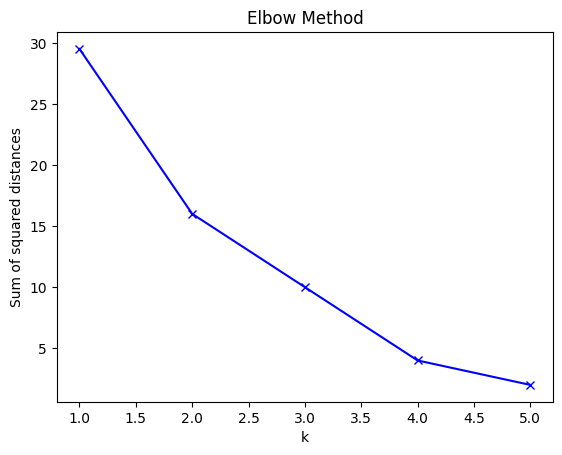

In [ ]:
# 當K值增加時，WCSS值會不斷減少，但當K值增加到一定程度後，WCSS值的下降就會變得越來越緩慢，這時候的K值就是所謂的“彎肘點”（Elbow Point）
# 這裡來說k = 2有轉折點， 只看345判斷不出來，需要其他指標
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# Define the range of k values to evaluate
k_values = range(1, 6)

# Initialize an empty list to store the sum of squared distances for each k
ssd = []

# Compute the sum of squared distances for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
# Plot the results
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()